# Chain (directional trend) # 
Every pair of consecutive subsequences in a chain must be connected by both a forward arrow and a backward arrow. The key component of drifting is that the time series must contain chains with clear directionality

Stumpy Tutorial Time Series Chains:
https://stumpy.readthedocs.io/en/latest/Tutorial_Time_Series_Chains.html

Matrix Profile VII: Time Series Chains:
https://sites.google.com/site/timeserieschain/

Robust Time Series Chain Discovery with Incremental Nearest Neighbors:
https://sites.google.com/view/robust-time-series-chain-22 

In [6]:
import core.testdata as testdata
import core.utils as utils
import core.calculate as calculate
import core.visualize as visualize

## Tilt Table Short Data (Robust Time Series Chain Discovery with Incremental Nearest Neighbors) ##
The arterial blood pressure (ABP) signal of a patient lying on a tilt table.

m = 180, length of a cardiac cycle (Robust Time Series Chain Discovery with Incremental Nearest Neighbors)

m = 200 (MP VII) BEST RESULTS

m = 205 (own research) 

In [7]:
# Parameter
use_case = "chains"
data_name = "tilttableshort"
T = testdata.load_from_mat("../data/" + use_case + "/" + data_name + ".mat", "tilt_table")
ground_truth = None # if ground_truth=None, the ground_truth is set to the unanchored chain without dilation

### Experiments ###

In [8]:
# Hyperparameter
target_w = 200
m = None
max_dilation = utils.calculate_max_d_from_m(m, len(T), max_d=10) if target_w is None else utils.calculate_max_d_from_target_w(target_w)
non_overlapping = False # if True, overlapping chains are filtered
offset = False # if offset=True, the chains with dilation are calculated with a starting offset of the chain without dilation

print("Dilation Sizes:", [i for i in range(1, max_dilation+1)])

Dilation Sizes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [9]:
# calculate:
# calculate.chains(T, max_dilation, data_name, use_case, ground_truth, offset, non_overlapping, target_w, m)

Visualizing Experiment: target_w=200, m=None, offset=False, groundtruthD1=True, nonoverlapping=False
chain for d=1, m=200, w=200: [5063 5262 5459 5659 6058 6452 7402 7596 7979 8174 9150 9536]
chain for d=2, m=101, w=201: [6405 6600 6792 7549 7932 8513 9103 9489 9684]
chain for d=3, m=67, w=199: [ 341 1087 1278 1472 2059 2260 2464 3495 4318]
chain for d=4, m=51, w=201: [ 331 1077 1268 1462 2049 2250 2454 3485 4308]
chain for d=5, m=41, w=201: [ 331 1077 1268 1462 2049 2250 2454 3485 4100]
chain for d=6, m=34, w=199: [5063 5261 5458 5860 6258 6451 7401 7595 7978 8173 9149 9535]
chain for d=7, m=29, w=197: [ 150  338 1084 1275 1469 2056 2257 2461 3492 4315]
chain for d=8, m=26, w=201: [ 149  337 1083 1274 1468 2055 2256 2460 3692 4515]
chain for d=9, m=23, w=199: [5642 6041 6435 6630 6822 7579 7962 8543 9133 9519 9714]
chain for d=10, m=21, w=201: [5107 5303 5503 5902 6297 6492 6685 7442 8019 8216 9191 9774]
chain for d=11, m=19, w=199: [ 146  334 1080 1271 1465 2052 2253 2457 3488 4311]


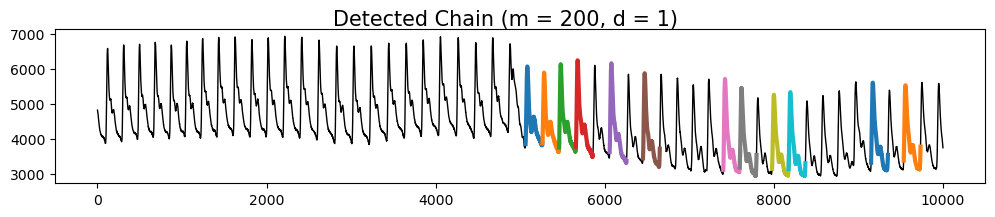

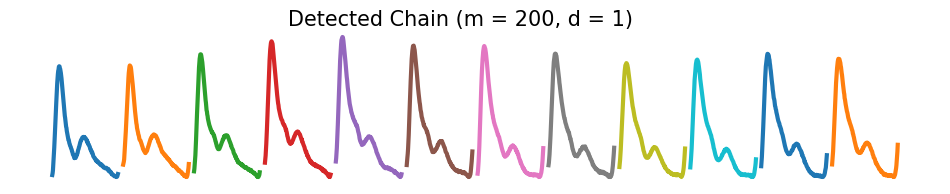

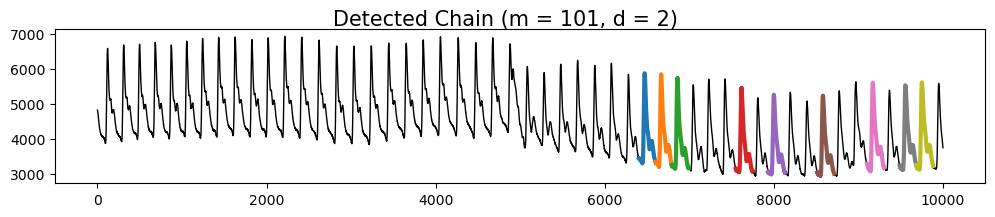

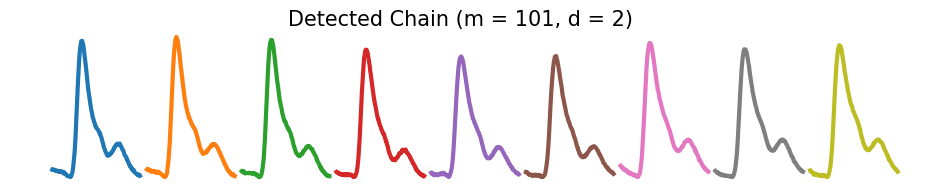

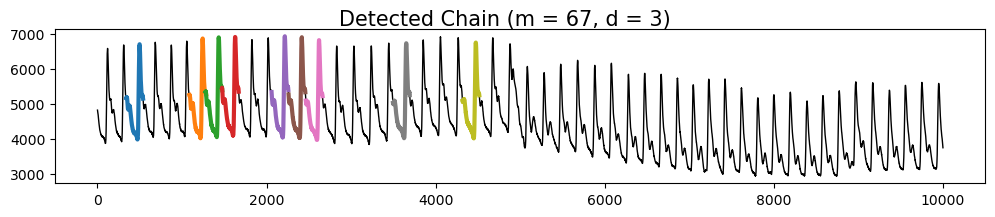

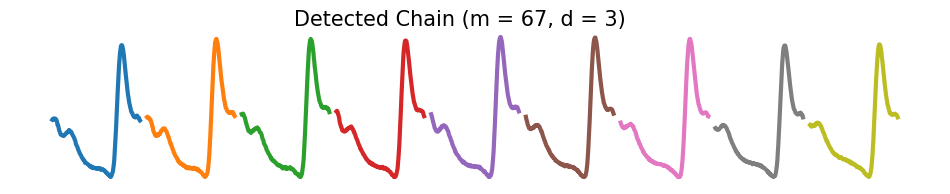

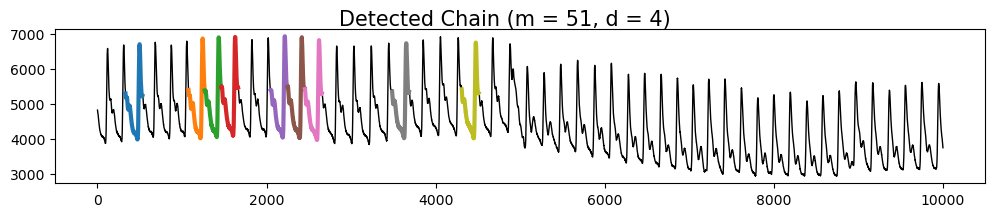

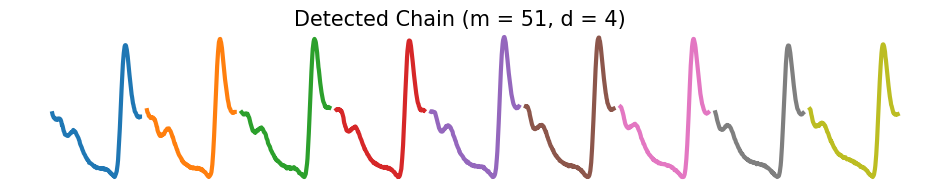

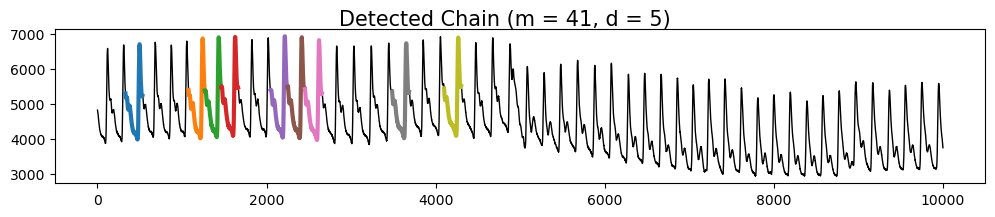

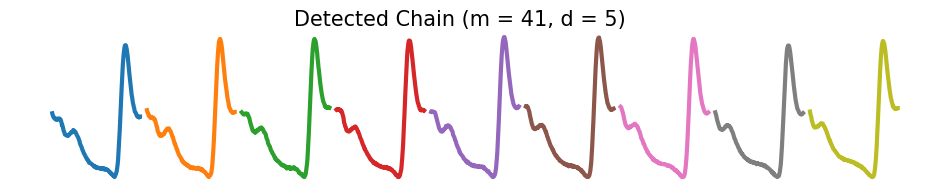

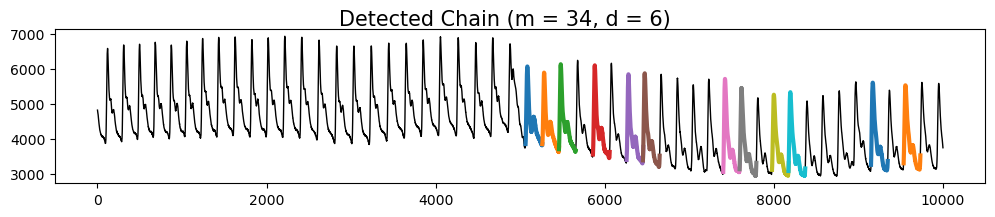

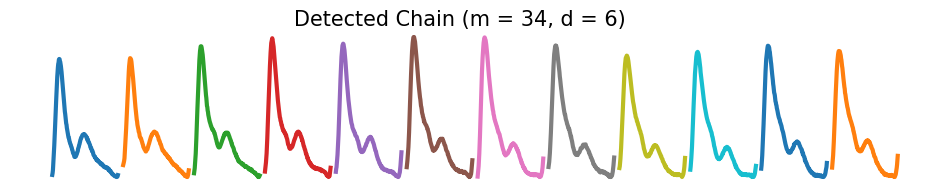

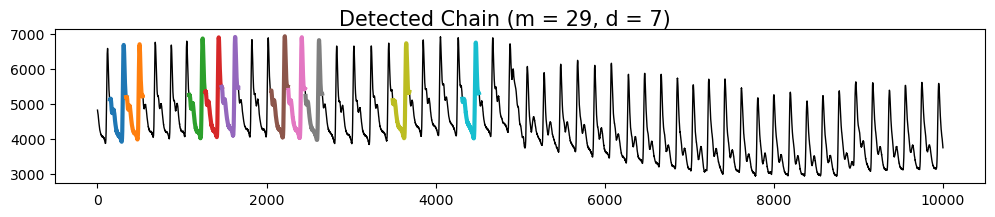

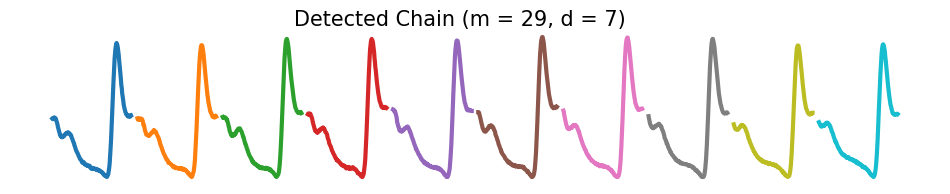

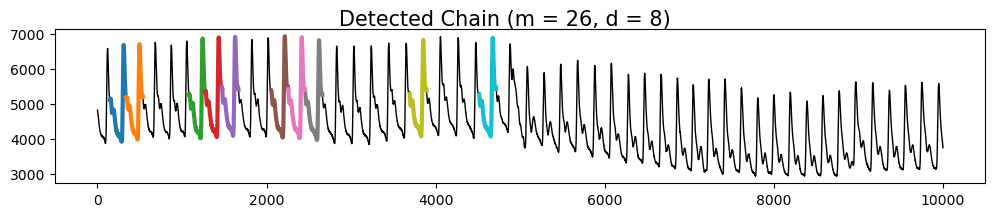

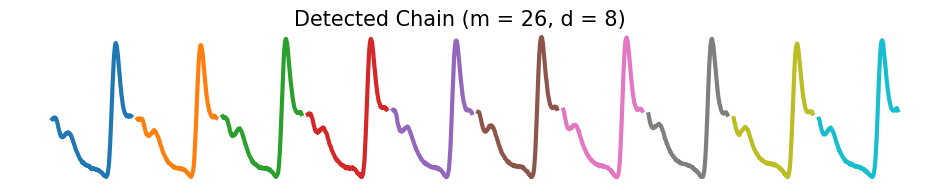

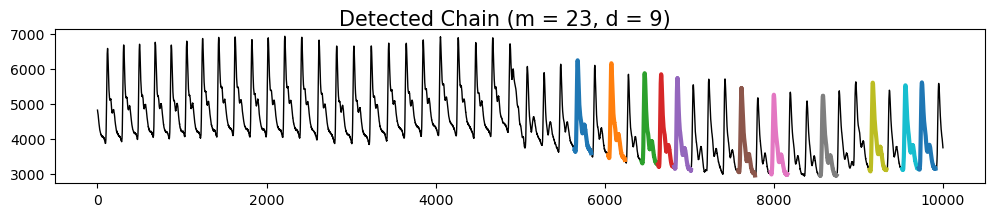

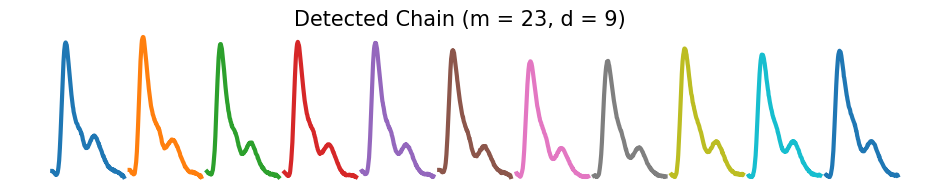

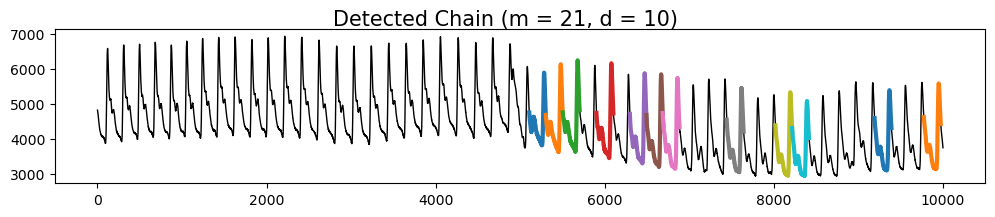

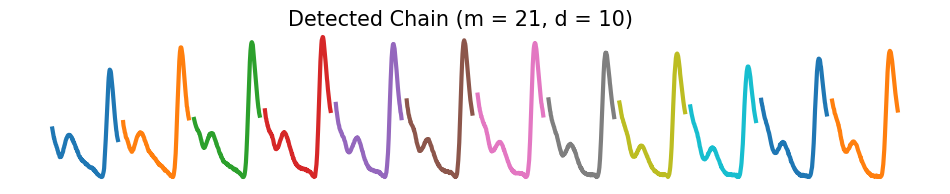

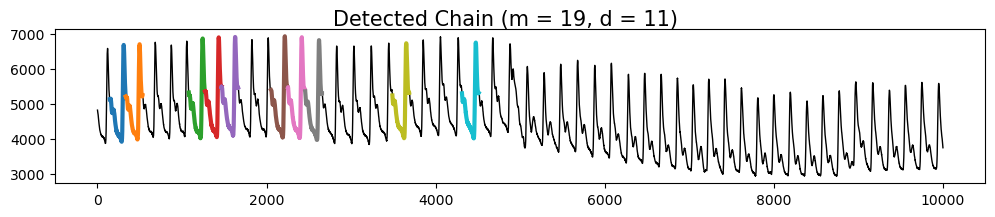

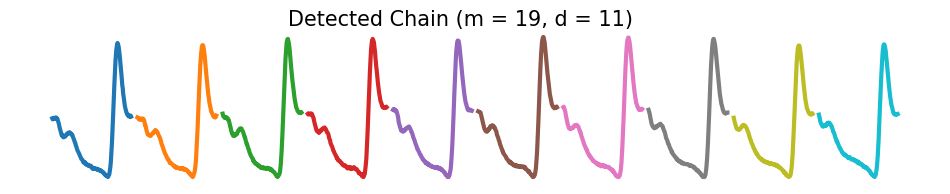

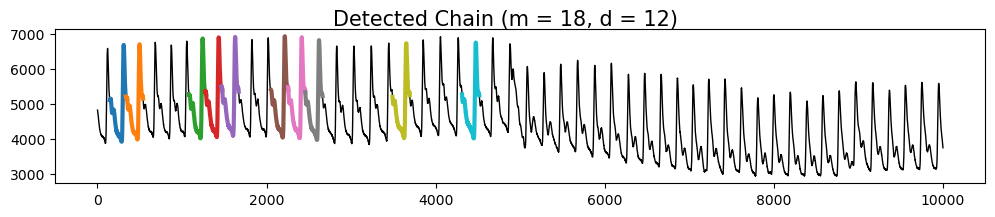

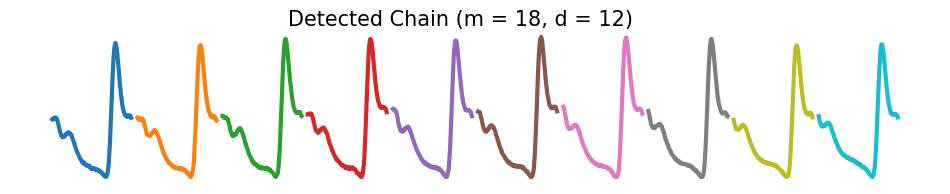

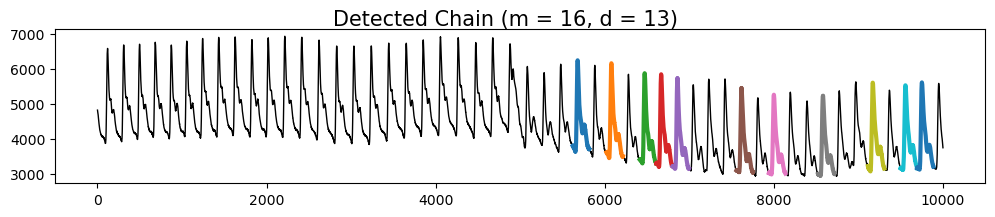

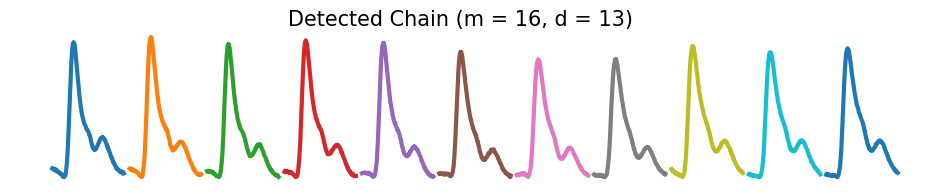

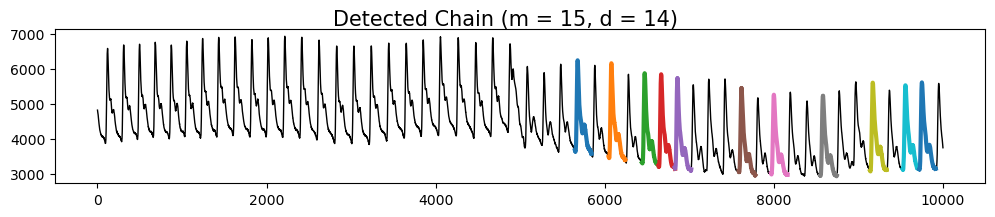

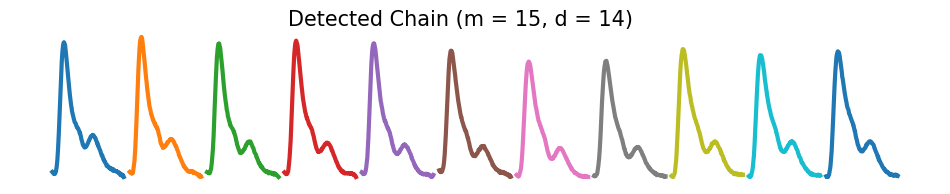

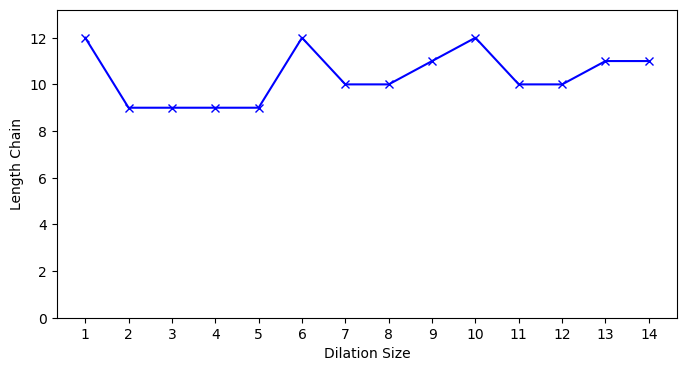

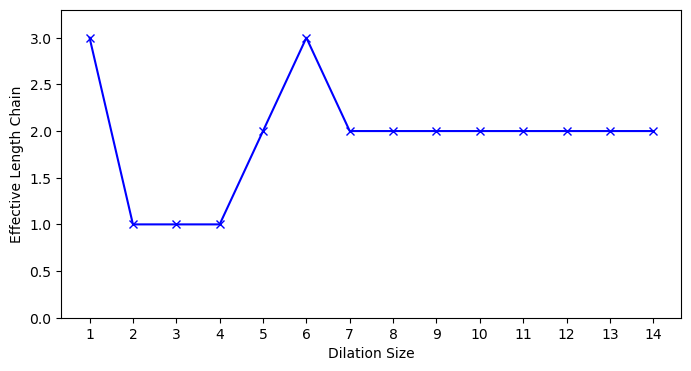

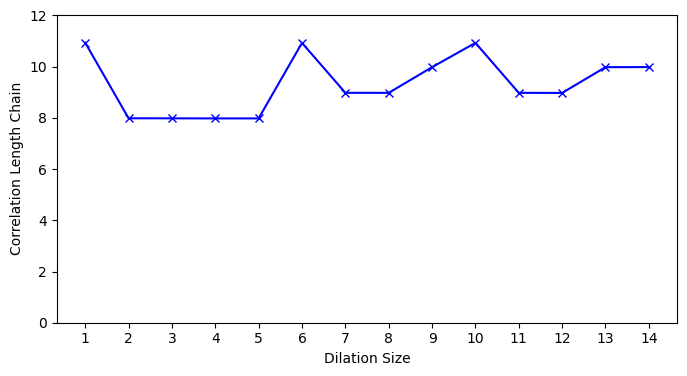

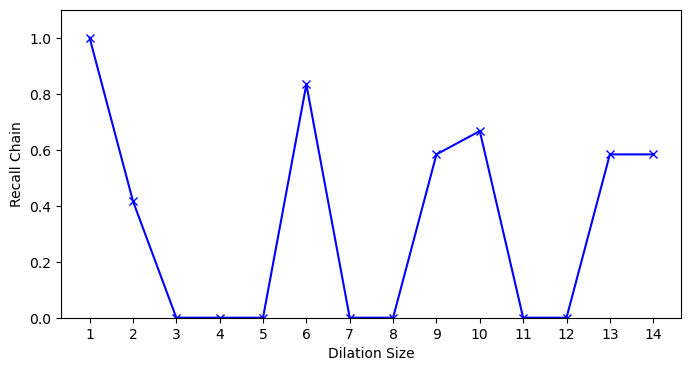

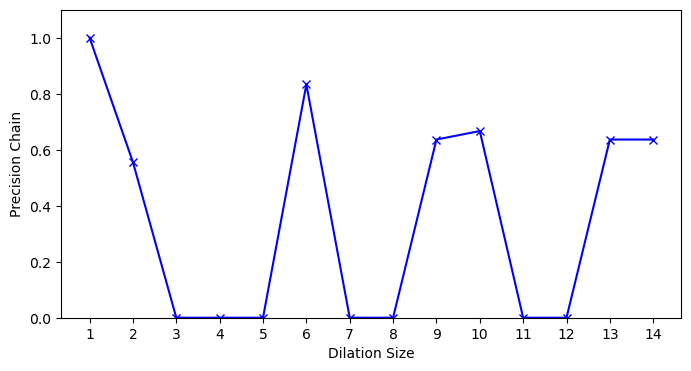

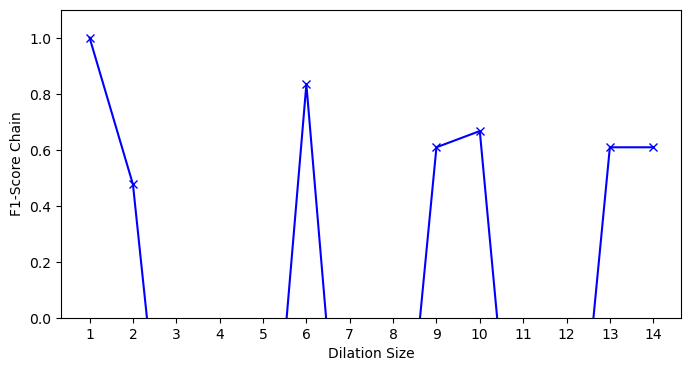

In [10]:
# visualize:
visualize.chains(max_dilation, data_name, use_case, offset, non_overlapping, target_w, m, ground_truth)